# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 어떤 성능지표를 기준으로 성능을 개선을 시도했고, 그러한 선택의 이유를 적어주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

In [2]:
credit = pd.read_csv("assignment3_creditcard.csv")

In [3]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

## Logistic Regression 

## preprocessing

In [5]:
X = credit.iloc[:, :-1]
y = credit['Class']

In [6]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.007183,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.827420,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.459073,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,0.002111,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.467781,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


In [7]:
print('1의 비율 :', y.mean())
print(y.value_counts())

1의 비율 : 0.008578004044912477
0    28432
1      246
Name: Class, dtype: int64


* 원본 데이터셋에서 독립변수(X)와 종속변수(y)를 분리한다.
* X의 통계량들을 확인한 결과 각 변수들은 모두 평균이 0에 가깝지만 표준편차의 크기가 상이하고, min값과 max값을 봤을때 이상치들이 다수 존재함을 알 수 있다.
* y는 사기가 1로 되어있는데, 그 비율이 현저히 낮다. 전체 28678중 246만이 1이고 그 비율은 0.0085이다.

#### 로지스틱 회귀분석에는 종속변수가 이항분포여야 한다는 가정을 제외하면 사실 크게 신경 쓸 기본 가정은 없는 듯 하므로 독립변수들에 간단히 표준화를 진행한 후 로지스틱 회귀분석을 실시한다.

In [8]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [9]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,...,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04,2.867800e+04
mean,-5.530597e-17,-2.114526e-17,-1.916701e-17,-6.894857e-18,5.385180e-17,2.996418e-18,-9.581568e-18,3.024243e-18,-3.774557e-18,-9.678351e-20,...,3.994449e-17,-1.666031e-17,-1.367309e-18,-1.758435e-17,1.841790e-17,9.149913e-18,3.071957e-17,1.873729e-18,-8.754069e-18,-6.354805e-18
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.503177e+01,-2.612761e+01,-1.766508e+01,-3.776757e+00,-2.832210e+01,-1.637204e+01,-2.849580e+01,-2.878613e+01,-1.182981e+01,-1.944962e+01,...,-5.591230e+00,-2.969587e+01,-2.533713e+01,-1.201742e+01,-6.175535e+01,-4.503490e+00,-1.295591e+01,-4.631360e+00,-1.868655e+01,-3.241807e+01
25%,-4.437564e-01,-3.892156e-01,-4.856507e-01,-5.942105e-01,-4.580970e-01,-5.678302e-01,-3.554381e-01,-1.555117e-01,-5.673308e-01,-4.010154e-01,...,-5.635158e-01,-2.947559e-01,-2.783608e-01,-7.283577e-01,-2.624144e-01,-5.886414e-01,-6.113030e-01,-6.749650e-01,-1.800852e-01,-1.810515e-01
50%,1.746923e-02,1.342993e-02,1.289095e-01,-3.116696e-02,-1.769798e-02,-2.001620e-01,5.991243e-02,1.201993e-02,-3.224254e-02,-4.490062e-02,...,-6.129726e-03,-9.083206e-02,-4.611644e-02,1.076176e-02,-1.077972e-02,6.779550e-02,4.200870e-02,-1.146949e-01,2.773428e-03,3.215157e-02
75%,6.561176e-01,4.661079e-01,6.119879e-01,4.956607e-01,4.351471e-01,2.991023e-01,4.196195e-01,2.371456e-01,5.504490e-01,4.006397e-01,...,5.566773e-01,1.784910e-01,2.054238e-01,7.127044e-01,2.554264e-01,7.260327e-01,6.848133e-01,4.990833e-01,2.283979e-01,2.607619e-01
max,1.188742e+00,1.324966e+01,2.341054e+00,8.022605e+00,2.215588e+01,1.682497e+01,2.524627e+01,1.466017e+01,7.170510e+00,1.219665e+01,...,6.310274e+00,3.642229e+01,3.209935e+01,1.130917e+01,1.624181e+01,6.545184e+00,4.850554e+00,6.455620e+00,2.804256e+01,5.030682e+01


각 변수들의 통계량(평균, 표준편차)을 봤을 때 표준화가 잘 된것을 확인할 수 있다.

## modeling

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)
#target에서 1의 비율을 맞춰주기 위해 stratify = y설정해줌

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21508, 28), (7170, 28), (21508,), (7170,))

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
#훈련집합 accuracy score
lr.score(X_train, y_train)

0.9980937325646271

In [14]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
y_proba = lr.predict_proba(X_test)[:, 1]
y_proba

array([1.15211771e-03, 2.45377808e-04, 7.83575753e-05, ...,
       2.85513039e-04, 4.62521475e-05, 1.11608112e-04])

In [16]:
ce_df = {'y_test' : y_test, # 실제
         'y_pred' : y_pred, # 예측
         'proba' : y_proba  # 1로 분류할 확률 
}

ce_df = pd.DataFrame(ce_df)
ce_df

,y_test,y_pred,proba
14581,0,0,0.001152
6050,0,0,0.000245
7191,0,0,0.000078
21060,0,0,0.000860
1225,0,0,0.000688
...,...,...,...
18599,0,0,0.000159
3616,0,0,0.001101
26849,0,0,0.000286
19261,0,0,0.000046


## Evaluation

#### 다양한 평가지표

In [17]:
#정확도
print("정확도 :", accuracy_score(y_test, y_pred), "baseline :", 1-y_test.mean())

정확도 : 0.997629009762901 baseline : 0.9913528591352859


1-y_test.mean()의 값 즉 0의 비율이 0.99135인것과 1의 비율이 극히 적은것을 감안하였을 때 적어도 baseline(0으로 밀기)보다는 좋은 성능인것같다.

In [20]:
#cross_entropy
cee = -np.sum((y_test * np.log(y_proba)) + (1 - y_test) * np.log(1 - y_proba)) / len(y_test)
b_p = np.array([1e-2 for _ in range(7170)])
baseline  = -np.sum((y_test * np.log(b_p)) + (1 - y_test) * np.log(1 - b_p)) / len(y_test)
print("cee :", cee, "baseline :", baseline)

cee : 0.013582966993890116 baseline : 0.049784984487859105


y_test의 값 중 대부분이 0이라서 확률값들을 전부 0.01로 예측했을 때의 cee를 baseline으로 설정

In [21]:
print('recall :', recall_score(y_test, y_pred))
print('precision :', precision_score(y_test, y_pred))
print('f1 :', f1_score(y_test, y_pred))
print("roc_auc :", roc_auc_score(y_test, y_pred))

recall : 0.8064516129032258
precision : 0.9090909090909091
f1 : 0.8547008547008547
roc_auc : 0.9028740900756984


In [22]:
#classifiction report를 사용하면 precision, recall, f1-score등을 편하게 구할 수 있음
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7108
           1       0.91      0.81      0.85        62

    accuracy                           1.00      7170
   macro avg       0.95      0.90      0.93      7170
weighted avg       1.00      1.00      1.00      7170



* recall(sensitivity)은 TP / (TP + FN)이고 실제로 1인 것중 예측이 1로 된 비율이다.
* precision은  TP / (TP + FP)이고 1로 예측된 것들 중 실제로 1인 비율이다.
* recall과 precision은 trade-off이므로 이 둘을 동시에 고려하기 위한 것이 f1score이고 이는 recall과 precision의 조화평균이다
* 현재 분류기는 recall값 즉 실제로 1인 것 중 예측이 1로 된 비율이 precision보다 낮다. 

#### confusion matrix의 TN, FP, FN, TP값을 가지고 위의 평가지표들을 계산하고 비교해본다

In [23]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))

[[7103    5]
 [  12   50]]


In [24]:
accuracy = (TN + TP) / (TN + FP + FN + TP)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
f1 = 2 / (1 / recall + 1 / precision)

In [25]:
print("accuracy :", accuracy)
print("recall :", recall)
print("precision :", precision)
print("specificity :", specificity)
print("f1: ", f1)

accuracy : 0.997629009762901
recall : 0.8064516129032258
precision : 0.9090909090909091
specificity : 0.9992965672481711
f1:  0.8547008547008548


sklearn.metrics의 함수를 사용한 결과와 같음을 확인할 수 있다

#### ROC Curve

* cutoff value(threshold)를 달리하며 가로축을 1 - specificity(fpr), 세로축을 recall(tpr)로 하여 시각화 한 그래프이다.
* 곡선이 y = x에 가까울수록 좋지 못한 성능이고, 곡선이 위로 향할수록 좋은 모델이다

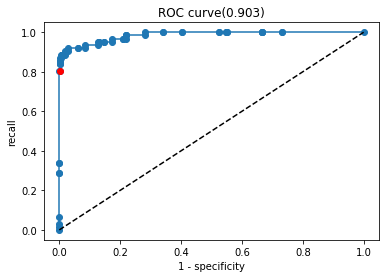

In [26]:
fpr, tpr, threshold = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, 'o-', label="ROC Curve")
plt.plot([0,1],[0,1], 'k--')
plt.plot([1 - specificity], [recall], 'ro')
plt.xlabel("1 - specificity")
plt.ylabel("recall")
plt.title("ROC curve(%.3f)"%roc_auc_score(y_test, y_pred))
plt.show()

모델의 roc_auc는 0.903으로 일반적으로 0.9가 넘으면 좋은 모델이라고 할 수 있다.

#### PR Plot(precision recall plot)

* precision recall plot은 roc와 유사하지만 target 데이터의 분포가 심하게 불균형할 때 사용한다. 그래프 X축을 Recall값, Y축을 Precision값을 사용한다.
* 현재 타겟 중 1의 비율이 0의 비율보다 압도적으로 적으므로 PR그래프가 분석에 더 유리하다고 할 수 있다.
* roc curve같은 경우 y=x를 기준으로 모델의 성능을 결정했지만, pr plot의 경우 baseline을 사용한다. baseline = positive / len(y_test)이다.

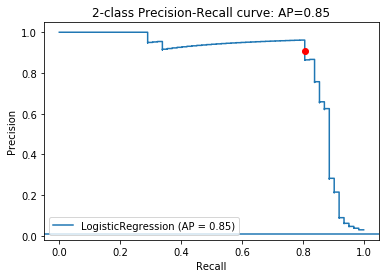

In [27]:
baseline = len(y_test[y_test == 1]) / len(y_test)
y_score = lr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(lr, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.plot([recall], [precision], 'ro')
plt.axhline(baseline)

#http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

#### f1_score plot

* 사기 탐지의 측면에서 사기를 놓치는 것이 다른 경우를 사기라고 판단하는 것보다 위험하지만 사용자 불편 측면에서 다른 경우를 사기거래라고 판단하는 것도 위험함 따라서 precision과 recall지표를 동시에 고려하는 f1_score를 이용하여 최적의 threshold를 탐색함

In [28]:
threshold = np.linspace(0, 1, 10000)
optimal_threshold = 0
max_f1_score = 0
f1_scores = []
for i in range(len(threshold)):
    y_pred_ = (y_proba > threshold[i])
    f1_score_ = f1_score(y_test, y_pred_)
    f1_scores.append(f1_score_)
    if f1_score_ >= max_f1_score:
        max_f1_score = f1_score_
        optimal_threshold = threshold[i]
        
print("최적의 threshold :", optimal_threshold, "f1_score :", max_f1_score)

최적의 threshold : 0.7677767776777678 f1_score : 0.8771929824561403


Text(0.5, 1.0, 'f1_score by threshold')

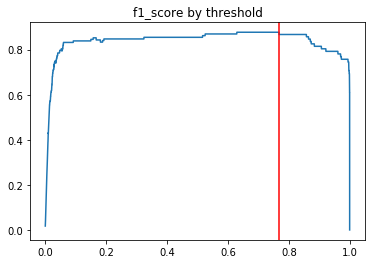

In [29]:
plt.plot(threshold, f1_scores)
plt.axvline(optimal_threshold, c = 'r')
plt.title("f1_score by threshold")

* 탐색한 threshold를 적용하여 accuracy, recall, precision, specificity를 확인하고 roc curve와 pr plot에서의 지점을 확인

In [30]:
y_pred = y_proba > optimal_threshold

In [31]:
print(confusion_matrix(y_test, y_pred))

[[7106    2]
 [  12   50]]


In [32]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
accuracy = (TN + TP) / (TN + FP + FN + TP)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
f1 = 2 / (1 / recall + 1 / precision)

In [33]:
print("accuracy :", accuracy)
print("recall :", recall)
print("precision :", precision)
print("specificity :", specificity)

accuracy : 0.998047419804742
recall : 0.8064516129032258
precision : 0.9615384615384616
specificity : 0.9997186268992684


specificity가 조금 줄었지만 accuracy, f1_score의 값이 조금 상승, precision의 값은 대폭 상승하였다

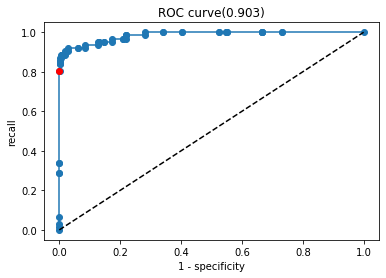

In [34]:
fpr, tpr, threshold = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, 'o-', label="ROC Curve")
plt.plot([0,1],[0,1], 'k--')
plt.plot([1 - specificity], [recall], 'ro')
plt.xlabel("1 - specificity")
plt.ylabel("recall")
plt.title("ROC curve(%.3f)"%roc_auc_score(y_test, y_pred))
plt.show()

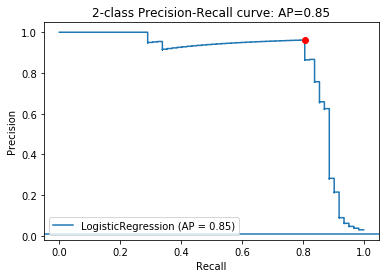

In [35]:
baseline = len(y_test[y_test == 1]) / len(y_test)
y_score = lr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(lr, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.plot([recall], [precision], 'ro')
plt.axhline(baseline)

그래프 결과 roc curve에서의 변화는 거의 없지만 precision이 대폭 상승하으로 인해 pr plot에서 그래프의 성능이 크게 향상하였음을 알수있다. 

## 정리

* 사기 탐지에서 어쨌건 가장 중요한 부분은 Positive이다. 이에 recall과 precision 둘 중 하나를 선택하기 힘들어 recall과 precision의 조화평균인 f1_score를 기준으로 최적의 cutoff value를 찾고자 했다.
* cutoff value를 f1_score를 기준으로 바꿈에 따라 TP와 FN의 변화는 없었으나 FP를 줄일수 있었다.